In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mlt
from collections import Counter
from collections import defaultdict
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [2]:
train = pd.read_csv('C:/Users/Admin/Desktop/Magistrale/Primo anno/Secondo semestre/DM2/UCI HAR Dataset/csv_files/train.csv')
test = pd.read_csv('C:/Users/Admin/Desktop/Magistrale/Primo anno/Secondo semestre/DM2/UCI HAR Dataset/csv_files/test.csv')

In [3]:
train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,2,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,2,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,2,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,2,WALKING_UPSTAIRS


In [4]:
test

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24,2,WALKING_UPSTAIRS
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24,2,WALKING_UPSTAIRS
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24,2,WALKING_UPSTAIRS
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24,2,WALKING_UPSTAIRS


In [24]:
# classe = {'Activity', 'ActivityName'}
attributes = [col for col in train.columns if col != 'Activity']
attributes.pop()
X_train = train[attributes].values
X_test = test[attributes].values
y_train = train['ActivityName']
y_test = test['ActivityName']

In [25]:
attributes

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [112]:
X_train

array([[ 2.8858451e-01, -2.0294171e-02, -1.3290514e-01, ...,
         1.7994061e-01, -5.8626924e-02,  1.0000000e+00],
       [ 2.7841883e-01, -1.6410568e-02, -1.2352019e-01, ...,
         1.8028889e-01, -5.4316717e-02,  1.0000000e+00],
       [ 2.7965306e-01, -1.9467156e-02, -1.1346169e-01, ...,
         1.8063731e-01, -4.9117815e-02,  1.0000000e+00],
       ...,
       [ 2.7338737e-01, -1.7010616e-02, -4.5021828e-02, ...,
         2.4914484e-01,  4.0811188e-02,  3.0000000e+01],
       [ 2.8965416e-01, -1.8843044e-02, -1.5828059e-01, ...,
         2.4643223e-01,  2.5339478e-02,  3.0000000e+01],
       [ 3.5150347e-01, -1.2423118e-02, -2.0386717e-01, ...,
         2.4680852e-01,  3.6694843e-02,  3.0000000e+01]])

In [111]:
X_test

array([[ 2.5717778e-01, -2.3285230e-02, -1.4653762e-02, ...,
         2.7680104e-01, -5.7978304e-02,  2.0000000e+00],
       [ 2.8602671e-01, -1.3163359e-02, -1.1908252e-01, ...,
         2.8134292e-01, -8.3898014e-02,  2.0000000e+00],
       [ 2.7548482e-01, -2.6050420e-02, -1.1815167e-01, ...,
         2.8008303e-01, -7.9346197e-02,  2.0000000e+00],
       ...,
       [ 3.4996609e-01,  3.0077442e-02, -1.1578796e-01, ...,
         2.7447878e-01,  1.8118355e-01,  2.4000000e+01],
       [ 2.3759383e-01,  1.8466870e-02, -9.6498932e-02, ...,
         2.6478161e-01,  1.8756291e-01,  2.4000000e+01],
       [ 1.5362719e-01, -1.8436506e-02, -1.3701846e-01, ...,
         2.6393619e-01,  1.8810340e-01,  2.4000000e+01]])

In [28]:
y_train

0               STANDING
1               STANDING
2               STANDING
3               STANDING
4               STANDING
              ...       
7347    WALKING_UPSTAIRS
7348    WALKING_UPSTAIRS
7349    WALKING_UPSTAIRS
7350    WALKING_UPSTAIRS
7351    WALKING_UPSTAIRS
Name: ActivityName, Length: 7352, dtype: object

In [29]:
y_test

0               STANDING
1               STANDING
2               STANDING
3               STANDING
4               STANDING
              ...       
2942    WALKING_UPSTAIRS
2943    WALKING_UPSTAIRS
2944    WALKING_UPSTAIRS
2945    WALKING_UPSTAIRS
2946    WALKING_UPSTAIRS
Name: ActivityName, Length: 2947, dtype: object

# Classification

In [32]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8720732948761453
F1-score [1.         0.80472103 0.83662478 0.88321884 0.86851628 0.825054  ]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.85      0.76      0.80       491
          STANDING       0.80      0.88      0.84       532
           WALKING       0.86      0.91      0.88       496
WALKING_DOWNSTAIRS       0.88      0.86      0.87       420
  WALKING_UPSTAIRS       0.84      0.81      0.83       471

          accuracy                           0.87      2947
         macro avg       0.87      0.87      0.87      2947
      weighted avg       0.87      0.87      0.87      2947



# DIMENSIONALITY REDUCTION

# Variance Threshold

In [33]:
from sklearn.feature_selection import VarianceThreshold

In [34]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_train_sel = sel.fit_transform(X_train)

X_train_sel.shape

(7352, 100)

In [35]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8137088564642009
F1-score [1.         0.7752443  0.816      0.76923077 0.79396985 0.7033195 ]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.83      0.73      0.78       491
          STANDING       0.77      0.86      0.82       532
           WALKING       0.75      0.79      0.77       496
WALKING_DOWNSTAIRS       0.84      0.75      0.79       420
  WALKING_UPSTAIRS       0.69      0.72      0.70       471

          accuracy                           0.81      2947
         macro avg       0.81      0.81      0.81      2947
      weighted avg       0.82      0.81      0.81      2947



# Univariate Feature Selection

In [36]:
from sklearn.feature_selection import SelectKBest

In [43]:
sel = SelectKBest(k=150)
X_train_sel = sel.fit_transform(X_train, y_train)

X_train_sel.shape

(7352, 150)

In [44]:

X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.850356294536817
F1-score [1.         0.82467532 0.85561497 0.83551402 0.79900744 0.75501114]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.88      0.78      0.82       491
          STANDING       0.81      0.90      0.86       532
           WALKING       0.78      0.90      0.84       496
WALKING_DOWNSTAIRS       0.83      0.77      0.80       420
  WALKING_UPSTAIRS       0.79      0.72      0.76       471

          accuracy                           0.85      2947
         macro avg       0.85      0.84      0.84      2947
      weighted avg       0.85      0.85      0.85      2947



# Recursive Feature Elimination

In [45]:
from sklearn.feature_selection import SelectFromModel

In [98]:
eli = SelectFromModel(DecisionTreeClassifier())
X_train_eli = eli.fit_transform(X_train, y_train)
X_train_eli.shape

(7352, 32)

In [99]:
X_test_eli = eli.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_eli, y_train)

y_pred = clf.predict(X_test_eli)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8591788259246692
F1-score [1.         0.79569892 0.8297491  0.87836583 0.83604506 0.79064588]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.84      0.75      0.80       491
          STANDING       0.79      0.87      0.83       532
           WALKING       0.81      0.95      0.88       496
WALKING_DOWNSTAIRS       0.88      0.80      0.84       420
  WALKING_UPSTAIRS       0.83      0.75      0.79       471

          accuracy                           0.86      2947
         macro avg       0.86      0.85      0.86      2947
      weighted avg       0.86      0.86      0.86      2947



# Principal Component Analysis

In [113]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

In [114]:
X_train_pca.shape

(7352, 2)

In [115]:
c_train = train['Activity']
c_train

0       5
1       5
2       5
3       5
4       5
       ..
7347    2
7348    2
7349    2
7350    2
7351    2
Name: Activity, Length: 7352, dtype: int64

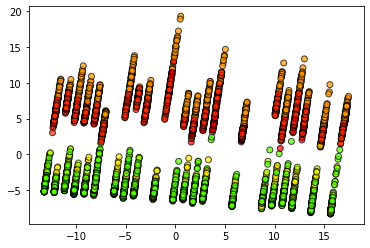

In [116]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c= c_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [117]:
X_test_pca = pca.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.35799117746861214
F1-score [0.46695279 0.34541985 0.38420491 0.30339321 0.3902439  0.23861171]
                    precision    recall  f1-score   support

            LAYING       0.43      0.51      0.47       537
           SITTING       0.32      0.37      0.35       491
          STANDING       0.44      0.34      0.38       532
           WALKING       0.30      0.31      0.30       496
WALKING_DOWNSTAIRS       0.40      0.38      0.39       420
  WALKING_UPSTAIRS       0.24      0.23      0.24       471

          accuracy                           0.36      2947
         macro avg       0.36      0.36      0.35      2947
      weighted avg       0.36      0.36      0.36      2947



In [55]:
# file1 = open("C:/Users/Admin/Desktop/Magistrale/Primo anno/Secondo semestre/DM2/UCI HAR Dataset/csv_files/train.csv", "a")

#file2 = open("C:/Users/Admin/Desktop/Magistrale/Primo anno/Secondo semestre/DM2/UCI HAR Dataset/csv_files/test.csv", "r")


#for line in file2:

#   file1.write(line)


#file1.close()

# file2.close()

In [56]:
# file1

<_io.TextIOWrapper name='C:/Users/Admin/Desktop/Magistrale/Primo anno/Secondo semestre/DM2/UCI HAR Dataset/csv_files/train.csv' mode='a' encoding='cp1252'>

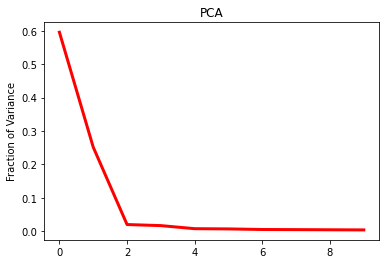

In [68]:
plt.plot(PCA(n_components=10).fit(X_train).explained_variance_ratio_, lw=3, color='r', ms=2)
plt.title("PCA")
plt.ylabel("Fraction of Variance")
plt.show()

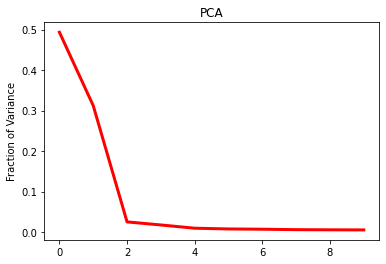

In [69]:
plt.plot(PCA(n_components=10).fit(X_test).explained_variance_ratio_, lw=3, color='r', ms=2)
plt.title("PCA")
plt.ylabel("Fraction of Variance")
plt.show()

# Random Subspace Projection

In [70]:
from sklearn import random_projection

In [71]:
rsp = random_projection.GaussianRandomProjection(n_components=2)
X_train_rsp = rsp.fit_transform(X_train)
X_train_rsp.shape

(7352, 2)

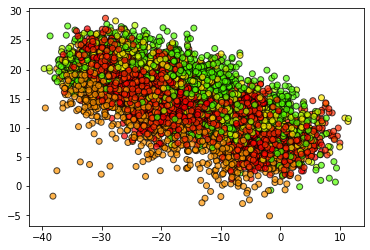

In [73]:
plt.scatter(X_train_rsp[:, 0], X_train_rsp[:, 1], c=c_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [74]:
X_test_rsp = rsp.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_rsp, y_train)

y_pred = clf.predict(X_test_rsp)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.2130980658296573
F1-score [0.20722892 0.21686747 0.20348304 0.1627409  0.41944444 0.10666667]
                    precision    recall  f1-score   support

            LAYING       0.18      0.24      0.21       537
           SITTING       0.20      0.24      0.22       491
          STANDING       0.20      0.21      0.20       532
           WALKING       0.17      0.15      0.16       496
WALKING_DOWNSTAIRS       0.50      0.36      0.42       420
  WALKING_UPSTAIRS       0.12      0.09      0.11       471

          accuracy                           0.21      2947
         macro avg       0.23      0.22      0.22      2947
      weighted avg       0.22      0.21      0.21      2947



# Multi Dimensional Scaling

In [78]:
from sklearn.manifold import MDS

In [79]:
mds = MDS(n_components=2)
X_train_mds = mds.fit_transform(X_train)
X_train_mds.shape

KeyboardInterrupt: 

In [ ]:
plt.scatter(X_train_mds[:, 0], X_train_mds[:, 1], c=c_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [ ]:
#X_test_mds = mds.transform(X_test) # no transform

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_mds, y_train)

y_pred = clf.predict(X_train_mds)

print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))

# IsoMap

In [80]:
from sklearn.manifold import Isomap

In [81]:
iso = Isomap(n_components=2)
X_train_iso = iso.fit_transform(X_train)
X_train_iso.shape

(7352, 2)

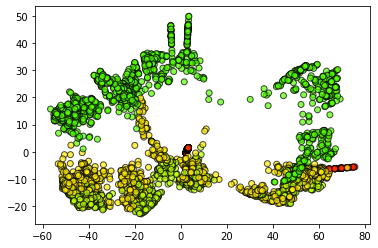

In [82]:
plt.scatter(X_train_iso[:, 0], X_train_iso[:, 1], c=c_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [118]:
X_test_iso = mds.fit_transform(X_test) # non ha transform come funzione

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_iso, y_train)

y_pred = clf.predict(X_test_iso)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))


KeyboardInterrupt: 

# t-SNE

In [84]:
from sklearn.manifold import TSNE

In [85]:
tsne = TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(X_train)
X_train_tsne.shape

(7352, 2)

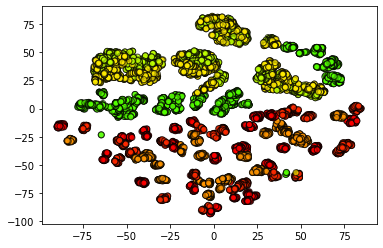

In [86]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=c_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [110]:
X_test_tsne = TSNE(verbose=2, perplexity=2).fit_transform(X_test)
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_tsne, y_train)

y_pred = clf.predict(X_test_tsne)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))


[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 2947 samples in 0.007s...
[t-SNE] Computed neighbors for 2947 samples in 1.077s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2947
[t-SNE] Computed conditional probabilities for sample 2000 / 2947
[t-SNE] Computed conditional probabilities for sample 2947 / 2947
[t-SNE] Mean sigma: 0.742487
[t-SNE] Computed conditional probabilities in 0.045s
[t-SNE] Iteration 50: error = 113.1581650, gradient norm = 0.1161780 (50 iterations in 2.681s)
[t-SNE] Iteration 100: error = 94.0383911, gradient norm = 0.1028180 (50 iterations in 1.162s)
[t-SNE] Iteration 150: error = 87.8294830, gradient norm = 0.0838196 (50 iterations in 0.754s)
[t-SNE] Iteration 200: error = 84.3013382, gradient norm = 0.0652149 (50 iterations in 0.649s)
[t-SNE] Iteration 250: error = 81.8585815, gradient norm = 0.0620705 (50 iterations in 0.823s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.858582
[t-SNE] Iteration 300: erro

In [101]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, height=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')


performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.010s...
[t-SNE] Computed neighbors for 7352 samples in 7.697s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.635854
[t-SNE] Computed conditional probabilities in 0.080s
[t-SNE] Iteration 50: error = 124.7421494, gradient norm = 0.0269315 (50 iterations in 5.214s)
[t-SNE] Iteration 100: error = 106.9459381, gradient norm = 0.0302033 (50 iterations in 

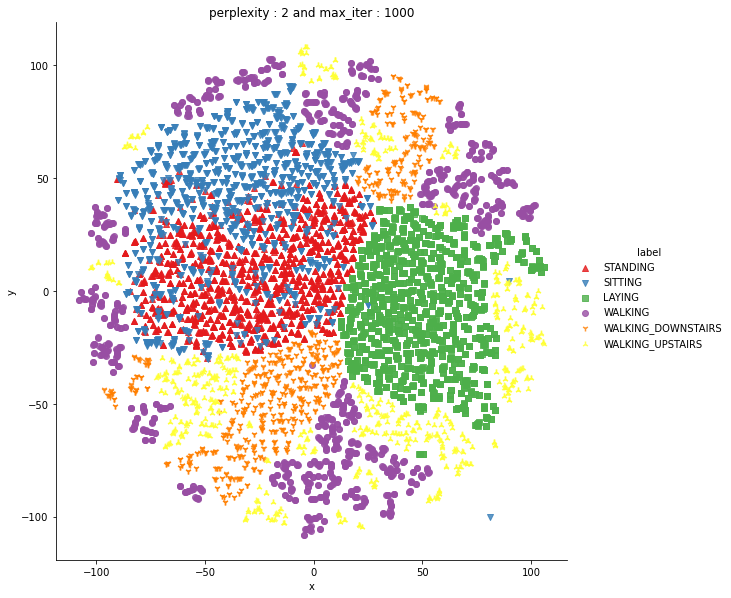

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.010s...
[t-SNE] Computed neighbors for 7352 samples in 4.307s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] Computed conditional probabilities in 0.190s
[t-SNE] Iteration 50: error = 114.2303543, gradient norm = 0.0165584 (50 iterations in 8.961s)
[t-SNE] Iteration 100: error = 97.6616287, gradient norm = 0.0170487 (50 iteration

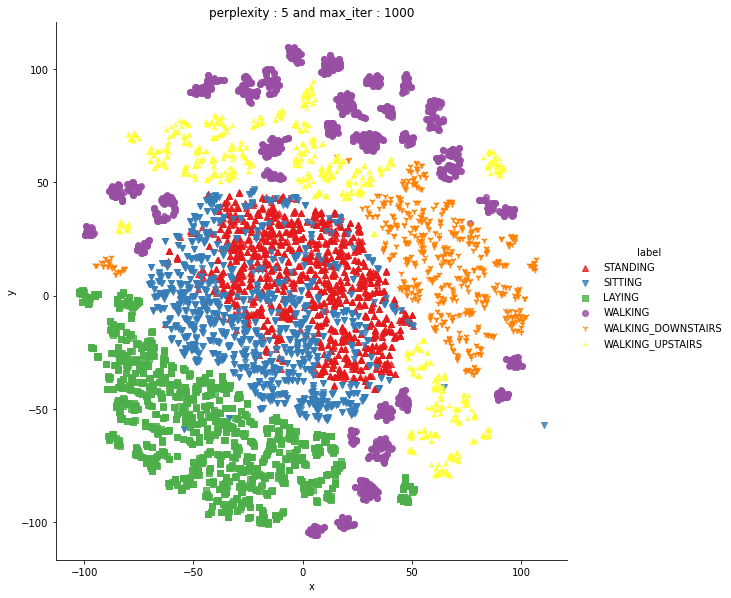

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.010s...
[t-SNE] Computed neighbors for 7352 samples in 2.001s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] Computed conditional probabilities in 0.110s
[t-SNE] Iteration 50: error = 105.3047104, gradient norm = 0.0254921 (50 iterations in 3.387s)
[t-SNE] Iteration 100: error = 90.2179642, gradient norm = 0.0117683 (50 iteratio

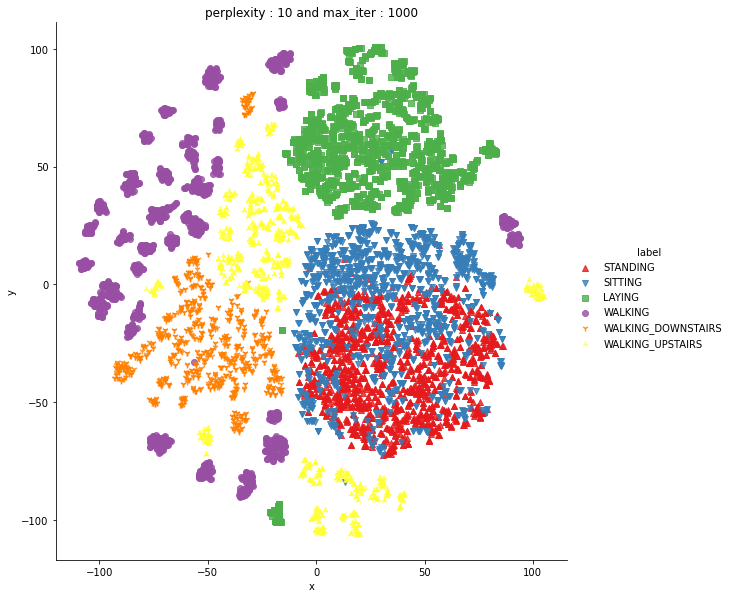

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.015s...
[t-SNE] Computed neighbors for 7352 samples in 5.851s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.645s
[t-SNE] Iteration 50: error = 97.8356628, gradient norm = 0.0150565 (50 iterations in 5.116s)
[t-SNE] Iteration 100: error = 84.9120255, gradient norm = 0.0087579 (50 iteration

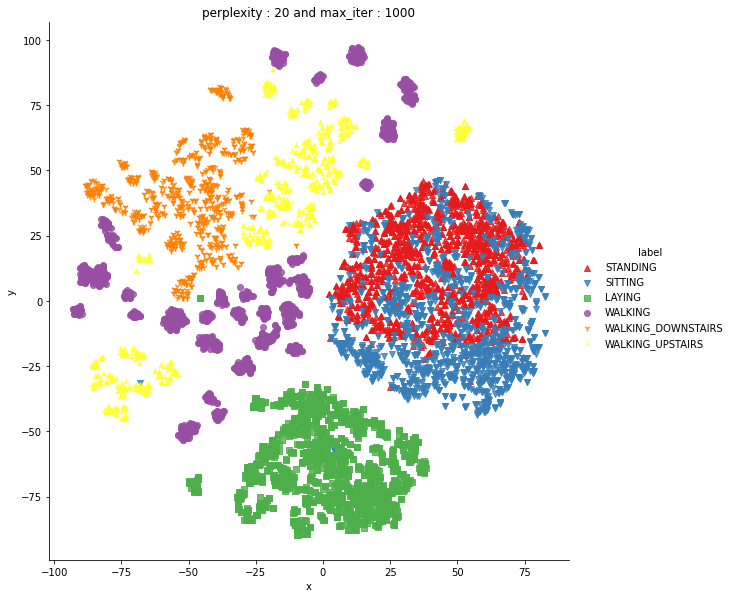

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.010s...
[t-SNE] Computed neighbors for 7352 samples in 2.945s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.811s
[t-SNE] Iteration 50: error = 86.2897720, gradient norm = 0.0235020 (50 iterations in 3.615s)
[t-SNE] Iteration 100: error = 75.7137756, gradient norm = 0.0046542 (50 iteratio

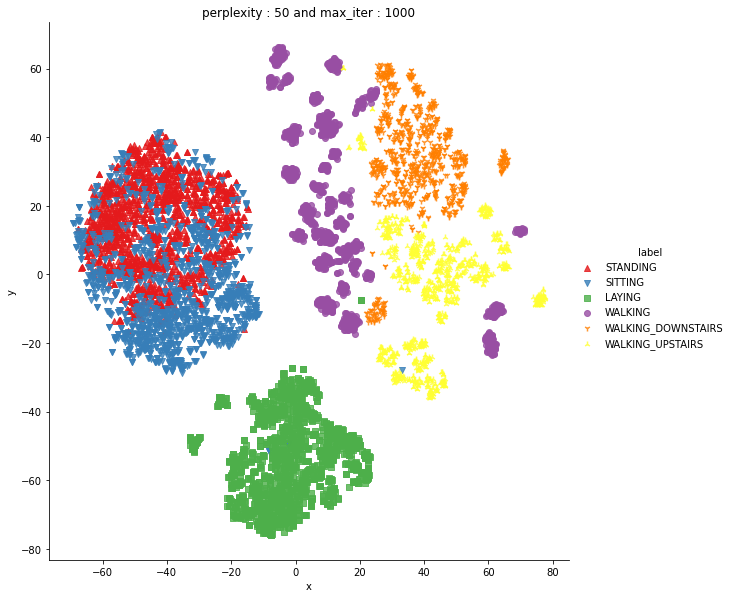

Done


In [103]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])

# IMBALANCED LEARNING

In [121]:
from collections import Counter
from collections import defaultdict
import seaborn as sns
from imblearn.datasets import make_imbalance

In [120]:
def ratio_func(y, multiplier, minority_class):
    target_stats = Counter(y)
    return {minority_class: int(multiplier * target_stats[minority_class])}

In [152]:
X_resampled_train, y_resampled_train = make_imbalance(
        X_train,
        y_train,
        sampling_strategy=ratio_func,
        **{"multiplier": 0.5, "minority_class": "STANDING", "minority_class": "LAYING","minority_class": "SITTING"},
    )

In [153]:
X_resampled_test, y_resampled_test = make_imbalance(
        X_test,
        y_test,
        sampling_strategy=ratio_func,
        **{"multiplier": 0.5, "minority_class": "STANDING", "minority_class": "LAYING","minority_class": "SITTING"},
    )

In [155]:
len(X_resampled_train)

6709

In [156]:
len(X_train)

7352

In [157]:
len(y_resampled)

6709

In [158]:
len(y_train)

7352

In [159]:
len(X_resampled_test)

2701

In [160]:
len(X_test)

2947

In [ ]:
len(y_train)

In [ ]:
len(y_train)

# Undersampling

In [147]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour

## Random Undersampler

In [161]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_resampled_train, y_resampled_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'LAYING': 643, 'SITTING': 643, 'STANDING': 643, 'WALKING': 643, 'WALKING_DOWNSTAIRS': 643, 'WALKING_UPSTAIRS': 643})


In [167]:
sel = SelectKBest(k=150)
X_train_sel = sel.fit_transform(X_res, y_res)

X_train_sel.shape
X_test_sel = sel.transform(X_resampled_test)

In [169]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_resampled_test)

print('Accuracy %s' % accuracy_score(y_resampled_test, y_pred))
print('F1-score %s' % f1_score(y_resampled_test, y_pred, average=None))
print(classification_report(y_resampled_test, y_pred))


Accuracy 0.8600518326545724
F1-score [1.         0.7751004  0.89393939 0.86066351 0.7970297  0.75740944]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.76      0.79      0.78       245
          STANDING       0.90      0.89      0.89       532
           WALKING       0.81      0.92      0.86       496
WALKING_DOWNSTAIRS       0.83      0.77      0.80       420
  WALKING_UPSTAIRS       0.78      0.73      0.76       471

          accuracy                           0.86      2701
         macro avg       0.85      0.85      0.85      2701
      weighted avg       0.86      0.86      0.86      2701



In [170]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_res)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_resampled_test, y_pred))
print('F1-score %s' % f1_score(y_resampled_test, y_pred, average=None))
print(classification_report(y_resampled_test, y_pred))

Accuracy 0.8422806368011847
F1-score [1.         0.74656189 0.87655502 0.82931533 0.78751501 0.73451327]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.72      0.78      0.75       245
          STANDING       0.89      0.86      0.88       532
           WALKING       0.79      0.87      0.83       496
WALKING_DOWNSTAIRS       0.79      0.78      0.79       420
  WALKING_UPSTAIRS       0.77      0.70      0.73       471

          accuracy                           0.84      2701
         macro avg       0.83      0.83      0.83      2701
      weighted avg       0.84      0.84      0.84      2701



## CondensedNearestNeighbour

In [171]:
import warnings
warnings.simplefilter("ignore")

In [172]:
cnn = CondensedNearestNeighbour(random_state=42, n_jobs=10)
X_res, y_res = cnn.fit_resample(X_resampled_train, y_resampled_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'SITTING': 643, 'STANDING': 352, 'LAYING': 81, 'WALKING_UPSTAIRS': 7, 'WALKING': 6, 'WALKING_DOWNSTAIRS': 5})


In [173]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_resampled_test)

print('Accuracy %s' % accuracy_score(y_resampled_test, y_pred))
print('F1-score %s' % f1_score(y_resampled_test, y_pred, average=None))
print(classification_report(y_resampled_test, y_pred))

Accuracy 0.645686782673084
F1-score [0.98679245 0.55238095 0.73820537 0.58125    0.4292804  0.43947368]
                    precision    recall  f1-score   support

            LAYING       1.00      0.97      0.99       537
           SITTING       0.41      0.83      0.55       245
          STANDING       0.73      0.75      0.74       532
           WALKING       0.60      0.56      0.58       496
WALKING_DOWNSTAIRS       0.45      0.41      0.43       420
  WALKING_UPSTAIRS       0.58      0.35      0.44       471

          accuracy                           0.65      2701
         macro avg       0.63      0.65      0.62      2701
      weighted avg       0.66      0.65      0.64      2701



In [174]:
sel = SelectKBest(k=150)
X_train_sel = sel.fit_transform(X_res, y_res)

X_train_sel.shape
X_test_sel = sel.transform(X_resampled_test)

In [175]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_res)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_resampled_test, y_pred))
print('F1-score %s' % f1_score(y_resampled_test, y_pred, average=None))
print(classification_report(y_resampled_test, y_pred))

Accuracy 0.6497593483894853
F1-score [1.         0.51145038 0.72711719 0.35778636 0.4774665  0.66322581]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.37      0.82      0.51       245
          STANDING       0.67      0.80      0.73       532
           WALKING       0.49      0.28      0.36       496
WALKING_DOWNSTAIRS       0.49      0.47      0.48       420
  WALKING_UPSTAIRS       0.85      0.55      0.66       471

          accuracy                           0.65      2701
         macro avg       0.64      0.65      0.62      2701
      weighted avg       0.68      0.65      0.64      2701



# OVERSAMPLING

In [176]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

### RandomOverSampler

In [177]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_resampled_train, y_resampled_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'LAYING': 1407, 'SITTING': 1407, 'STANDING': 1407, 'WALKING': 1407, 'WALKING_DOWNSTAIRS': 1407, 'WALKING_UPSTAIRS': 1407})


In [178]:
sel = SelectKBest(k=150)
X_train_sel = sel.fit_transform(X_res, y_res)

X_train_sel.shape
X_test_sel = sel.transform(X_resampled_test)

In [179]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_resampled_test)

print('Accuracy %s' % accuracy_score(y_resampled_test, y_pred))
print('F1-score %s' % f1_score(y_resampled_test, y_pred, average=None))
print(classification_report(y_resampled_test, y_pred))

Accuracy 0.8604220659015179
F1-score [1.         0.77865613 0.89312977 0.86635071 0.79345088 0.75675676]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.75      0.80      0.78       245
          STANDING       0.91      0.88      0.89       532
           WALKING       0.82      0.92      0.87       496
WALKING_DOWNSTAIRS       0.84      0.75      0.79       420
  WALKING_UPSTAIRS       0.77      0.74      0.76       471

          accuracy                           0.86      2701
         macro avg       0.85      0.85      0.85      2701
      weighted avg       0.86      0.86      0.86      2701



In [180]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_res)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_resampled_test, y_pred))
print('F1-score %s' % f1_score(y_resampled_test, y_pred, average=None))
print(classification_report(y_resampled_test, y_pred))

Accuracy 0.8445020362828582
F1-score [1.         0.77637131 0.90185185 0.80870354 0.77042802 0.73333333]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.80      0.75      0.78       245
          STANDING       0.89      0.92      0.90       532
           WALKING       0.73      0.90      0.81       496
WALKING_DOWNSTAIRS       0.85      0.71      0.77       420
  WALKING_UPSTAIRS       0.77      0.70      0.73       471

          accuracy                           0.84      2701
         macro avg       0.84      0.83      0.83      2701
      weighted avg       0.85      0.84      0.84      2701



### SMOTE

In [181]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_resampled_train, y_resampled_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'LAYING': 1407, 'SITTING': 1407, 'STANDING': 1407, 'WALKING': 1407, 'WALKING_DOWNSTAIRS': 1407, 'WALKING_UPSTAIRS': 1407})


In [182]:
sel = SelectKBest(k=150)
X_train_sel = sel.fit_transform(X_res, y_res)

X_train_sel.shape
X_test_sel = sel.transform(X_resampled_test)

In [183]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_resampled_test)

print('Accuracy %s' % accuracy_score(y_resampled_test, y_pred))
print('F1-score %s' % f1_score(y_resampled_test, y_pred, average=None))
print(classification_report(y_resampled_test, y_pred))

Accuracy 0.8678267308404295
F1-score [1.         0.77432712 0.89822596 0.8828125  0.79438059 0.77766287]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.79      0.76      0.77       245
          STANDING       0.89      0.90      0.90       532
           WALKING       0.86      0.91      0.88       496
WALKING_DOWNSTAIRS       0.86      0.74      0.79       420
  WALKING_UPSTAIRS       0.76      0.80      0.78       471

          accuracy                           0.87      2701
         macro avg       0.86      0.85      0.85      2701
      weighted avg       0.87      0.87      0.87      2701



In [184]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_res)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_resampled_test, y_pred))
print('F1-score %s' % f1_score(y_resampled_test, y_pred, average=None))
print(classification_report(y_resampled_test, y_pred))

Accuracy 0.8467234357645317
F1-score [1.         0.74789916 0.88868275 0.80808081 0.8034398  0.75463918]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.77      0.73      0.75       245
          STANDING       0.88      0.90      0.89       532
           WALKING       0.81      0.81      0.81       496
WALKING_DOWNSTAIRS       0.83      0.78      0.80       420
  WALKING_UPSTAIRS       0.73      0.78      0.75       471

          accuracy                           0.85      2701
         macro avg       0.84      0.83      0.83      2701
      weighted avg       0.85      0.85      0.85      2701

